In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

print("✅ Semua library berhasil diimport!")


✅ Semua library berhasil diimport!


In [2]:
import pandas as pd

# Data mentah dalam format CSV (teks)
data = """IPK,Jumlah_Absensi,Waktu_Belajar_Jam,Lulus
3.8,3,10,1
2.5,8,5,0
3.4,4,7,1
2.1,12,2,0
3.9,2,12,1
2.8,6,4,0
3.2,5,8,1
2.7,7,3,0
3.6,4,9,1
2.3,9,4,0
"""

# Simpan jadi file CSV di folder notebook
with open("kelulusan_mahasiswa.csv", "w", encoding="utf-8") as f:
    f.write(data)

# Baca file CSV untuk memastikan sudah benar
df = pd.read_csv("kelulusan_mahasiswa.csv")
print(df.head())


   IPK  Jumlah_Absensi  Waktu_Belajar_Jam  Lulus
0  3.8               3                 10      1
1  2.5               8                  5      0
2  3.4               4                  7      1
3  2.1              12                  2      0
4  3.9               2                 12      1


Info Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   IPK                10 non-null     float64
 1   Jumlah_Absensi     10 non-null     int64  
 2   Waktu_Belajar_Jam  10 non-null     int64  
 3   Lulus              10 non-null     int64  
dtypes: float64(1), int64(3)
memory usage: 448.0 bytes
None

Data Awal:
   IPK  Jumlah_Absensi  Waktu_Belajar_Jam  Lulus
0  3.8               3                 10      1
1  2.5               8                  5      0
2  3.4               4                  7      1
3  2.1              12                  2      0
4  3.9               2                 12      1

Cek Missing Value:
IPK                  0
Jumlah_Absensi       0
Waktu_Belajar_Jam    0
Lulus                0
dtype: int64


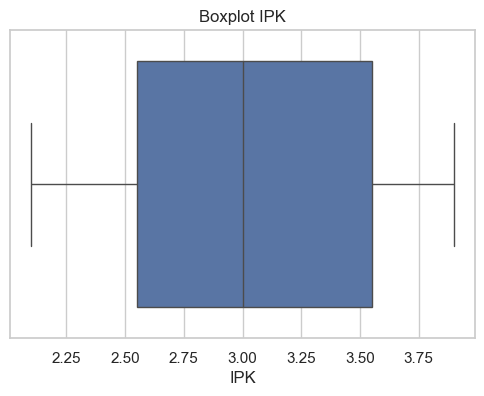


Statistik Deskriptif:
             IPK  Jumlah_Absensi  Waktu_Belajar_Jam      Lulus
count  10.000000        10.00000          10.000000  10.000000
mean    3.030000         6.00000           6.400000   0.500000
std     0.639531         3.05505           3.306559   0.527046
min     2.100000         2.00000           2.000000   0.000000
25%     2.550000         4.00000           4.000000   0.000000
50%     3.000000         5.50000           6.000000   0.500000
75%     3.550000         7.75000           8.750000   1.000000
max     3.900000        12.00000          12.000000   1.000000


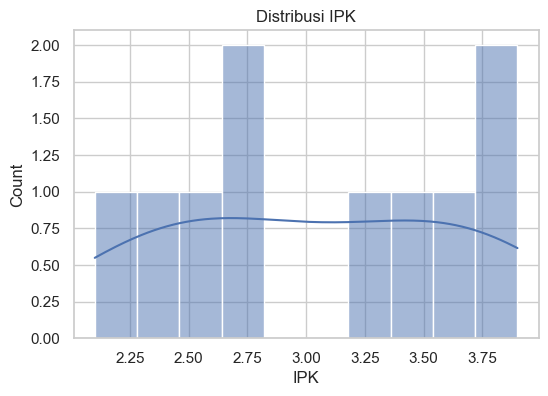

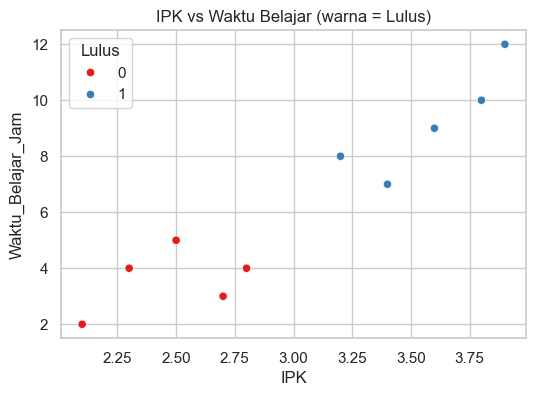

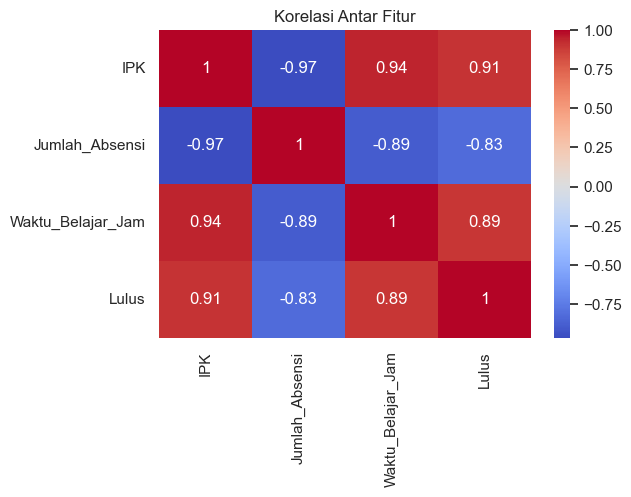


Dataset setelah feature engineering disimpan ke processed_kelulusan.csv

Ukuran dataset:
Train: (8, 5)
Test: (2, 5)


In [5]:
# ======================================================
# LANGKAH 1 — IMPORT LIBRARY
# ======================================================
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Atur agar grafik tampil rapi
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (6,4)

# ======================================================
# LANGKAH 2 — BACA DATASET
# ======================================================
df = pd.read_csv("kelulusan_mahasiswa.csv")
print("Info Dataset:")
print(df.info())
print("\nData Awal:")
print(df.head())

# ======================================================
# LANGKAH 3 — CLEANING
# ======================================================
print("\nCek Missing Value:")
print(df.isnull().sum())

# Hapus duplikat (kalau ada)
df = df.drop_duplicates()

# Boxplot untuk cek outlier di IPK
sns.boxplot(x=df['IPK'])
plt.title("Boxplot IPK")
plt.show()

# ======================================================
# LANGKAH 4 — EXPLORATORY DATA ANALYSIS (EDA)
# ======================================================
print("\nStatistik Deskriptif:")
print(df.describe())

# Histogram distribusi IPK
sns.histplot(df['IPK'], bins=10, kde=True)
plt.title("Distribusi IPK")
plt.show()

# Scatterplot IPK vs Waktu Belajar
sns.scatterplot(x='IPK', y='Waktu_Belajar_Jam', data=df, hue='Lulus', palette="Set1")
plt.title("IPK vs Waktu Belajar (warna = Lulus)")
plt.show()

# Heatmap korelasi
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Korelasi Antar Fitur")
plt.show()

# ======================================================
# LANGKAH 5 — FEATURE ENGINEERING
# ======================================================
df['Rasio_Absensi'] = df['Jumlah_Absensi'] / 14
df['IPK_x_Study'] = df['IPK'] * df['Waktu_Belajar_Jam']

# Simpan hasil ke file baru
df.to_csv("processed_kelulusan.csv", index=False)
print("\nDataset setelah feature engineering disimpan ke processed_kelulusan.csv")

# ======================================================
# LANGKAH 6 — SPLITTING DATASET
# ======================================================
X = df.drop('Lulus', axis=1)
y = df['Lulus']

# Split 80% train, 20% test dengan stratify
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42)

print("\nUkuran dataset:")
print("Train:", X_train.shape)
print("Test:", X_test.shape)

